# Logistic model fitting using Sequential Monte Carlo

This example illustrates how to use SMC to sample from a posterior distribution for the logistic model, with normal errors. This example also indicates how it is typically necessary to tune hyperparameters to ensure good algorithmic performance on a given problem.

In [21]:
import os
os.chdir('../')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [-5, 400, noise*0.1],
    [5, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Select mean and variance matrix of initial proposal dist
x0 = [0.015,500,10]

# Create mcmc routine
sampler = pints.SMC(log_posterior, x0)

# Set number of particles
sampler.set_particles(10000)

# Run sampler
samples = sampler.run()

Running Sequential Monte Carlo
Total number of particles: 10000
Number of temperatures: 10
Resampling at end of each iteration
Number of MCMC steps at each temperature: 1
Temperature Eval. Time m:s
 0.99972    21000   0:05.1
 0.99923    31000   0:10.7
 0.99785    41000   0:16.7
 0.99401    51000   0:22.8
 0.98332    61000   0:29.0
 0.95358    71000   0:35.2
 0.87085    81000   0:41.4
 0.64062    91000   0:47.6
 0          101000   0:53.7


## Plot results

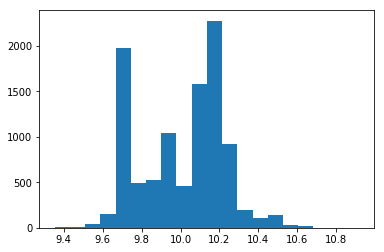

1885.73534309


In [27]:
plt.hist(samples[:, 2], 20)
plt.show()
print(sampler.ess())